## Qualitative Analysis for Base Event Log (Event Log with some Randomness)

Implemented decision points with guards:
- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval if total_price <= 1000
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Manager Approval 
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Standard Approval 

In [18]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

#### First, look which machine learning guard has the highest performance for a decision point.

In [19]:
event_log_base = import_log(os.path.join(os.getcwd(), "..", 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)
decision_points

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[({'create purchase order'}, {'request manager approval', 'request standard approval'}),
 ({'request standard approval'}, {'reject purchase', 'approve purchase'}),
 ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})]

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})
Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x0000026918ACC3A0>


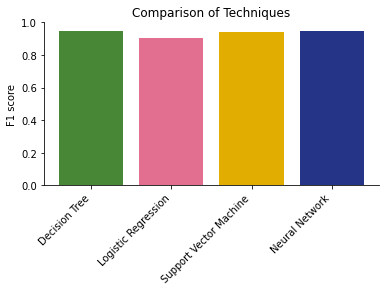

In [20]:
print("Decision point: ", decision_points[0])
dpn_base.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x0000026918ACC100>


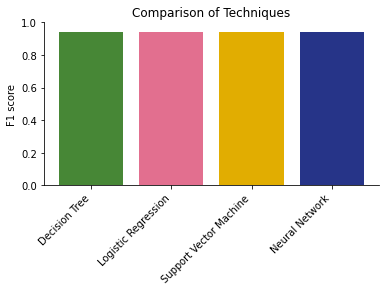

In [21]:
print("Decision point: ", decision_points[1])
dpn_base.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x0000026918ACC940>


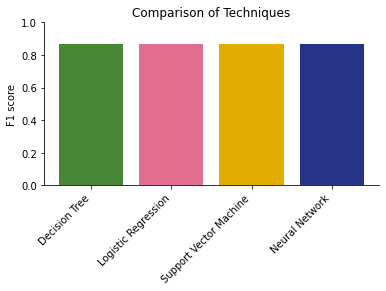

In [22]:
print("Decision point: ", decision_points[2])
dpn_base.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

### Decision Tree 

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


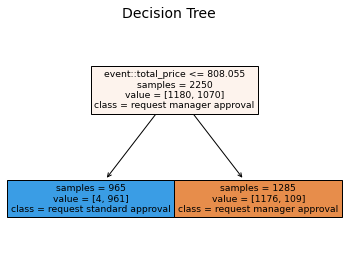

In [23]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


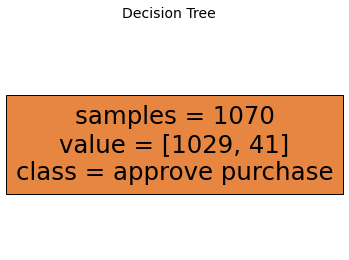

In [24]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


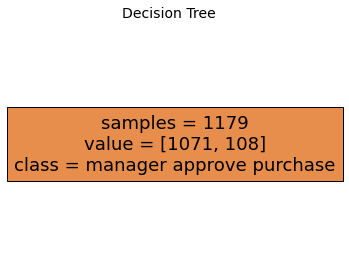

In [25]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network 

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


  0%|          | 0/100 [00:00<?, ?it/s]

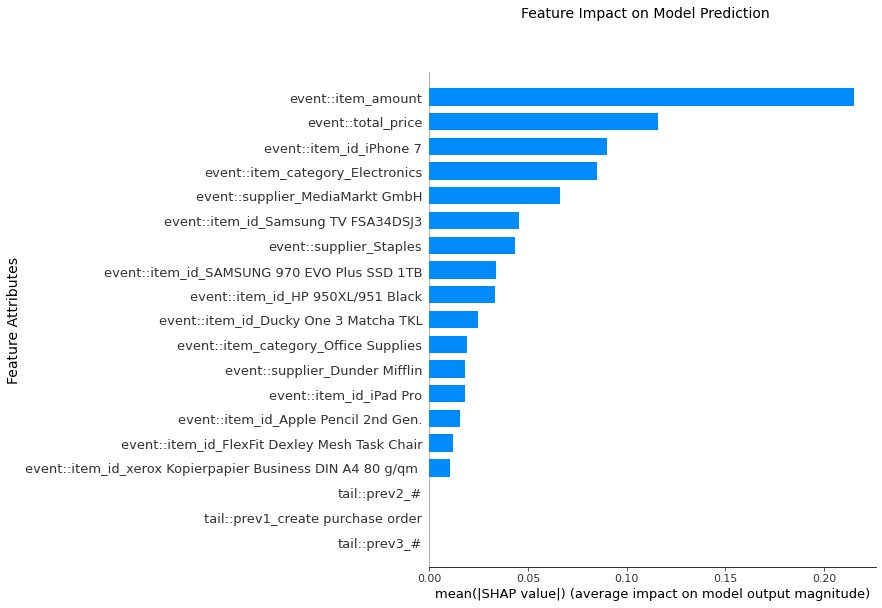

In [26]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_points[0]].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_points[0]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

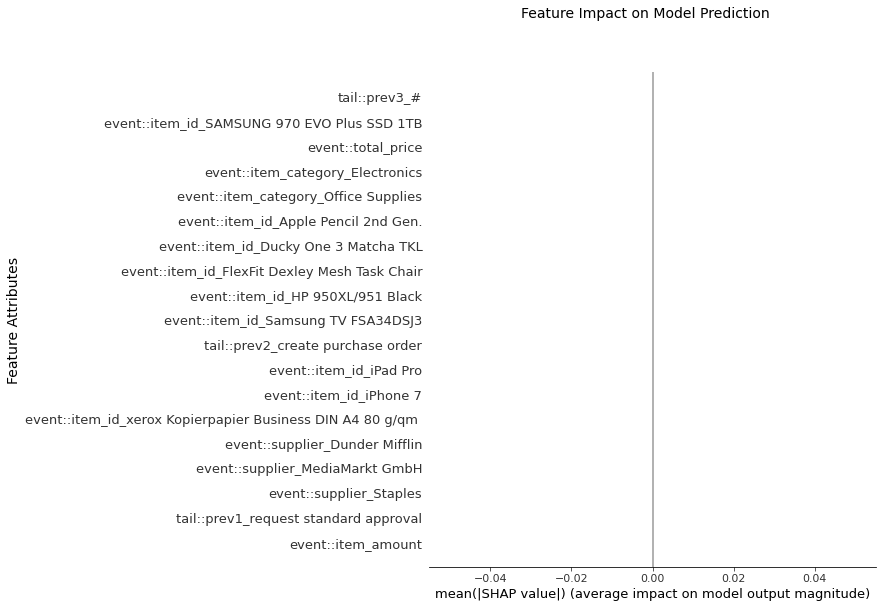

In [27]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_points[1]].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_points[1]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

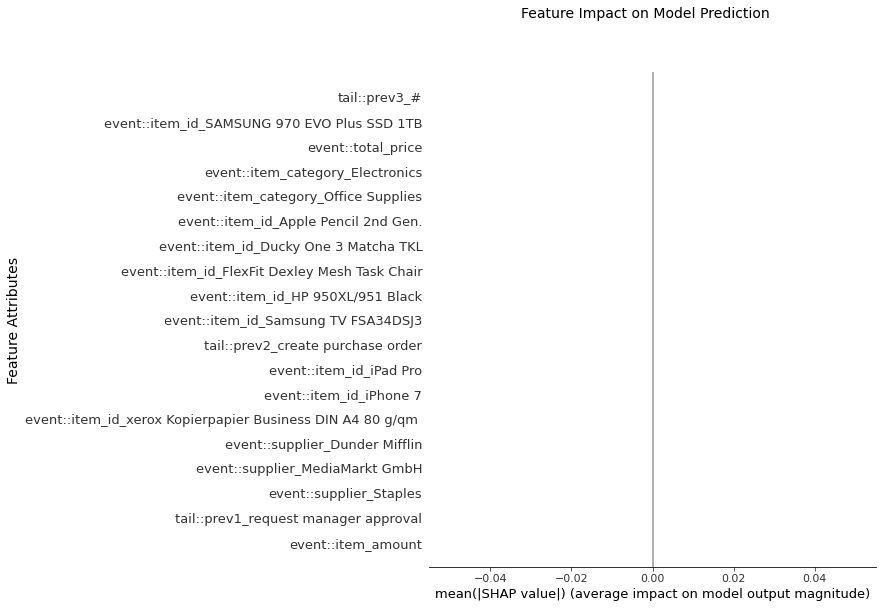

In [28]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_points[2]].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_points[2]].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

### Support Vector Machine 

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


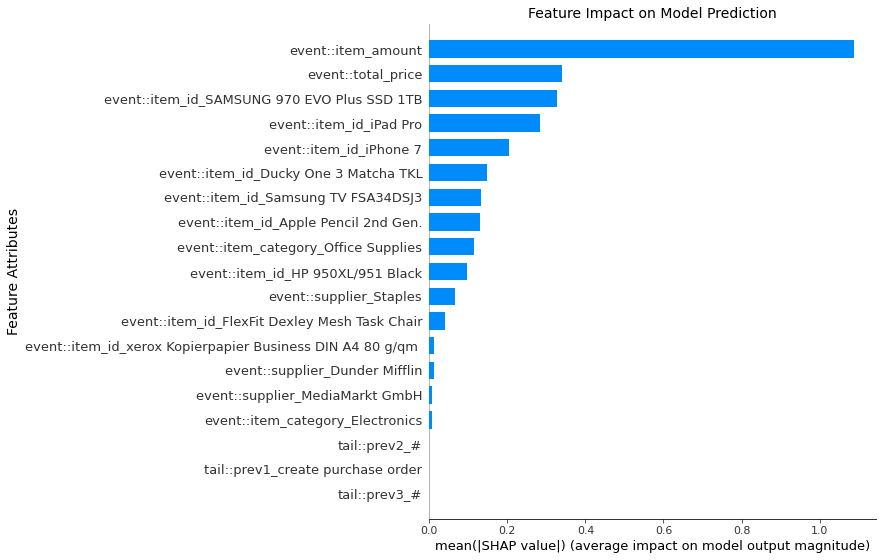

In [29]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[0]].X_test)

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


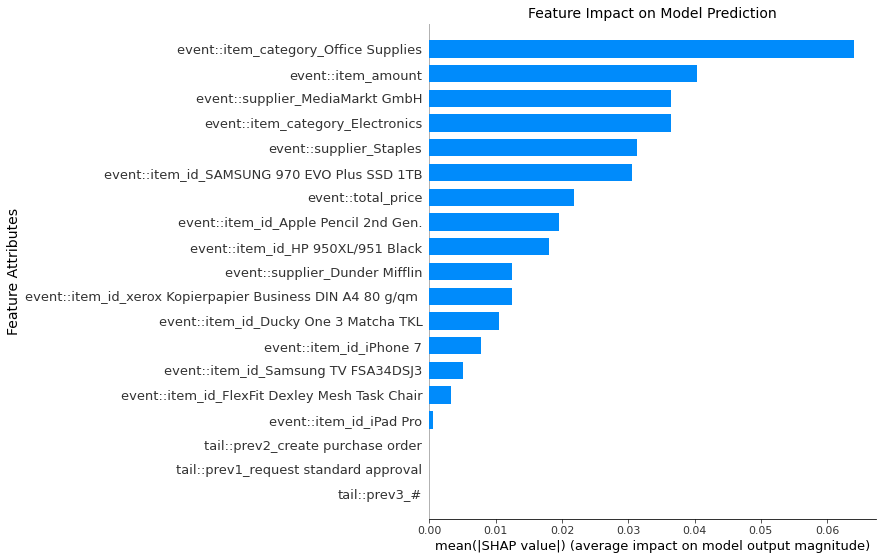

In [30]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[1]].X_test)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


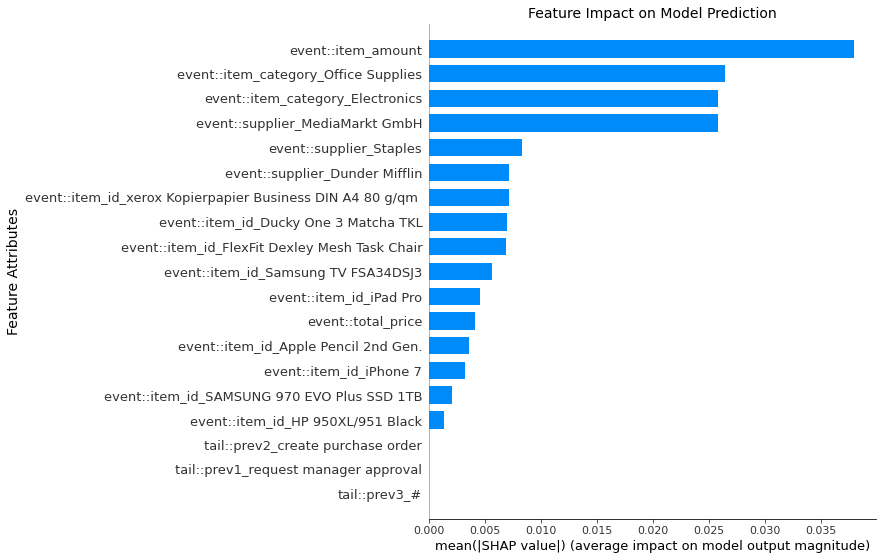

In [31]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[2]].X_test)

### Logistic Regression 

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


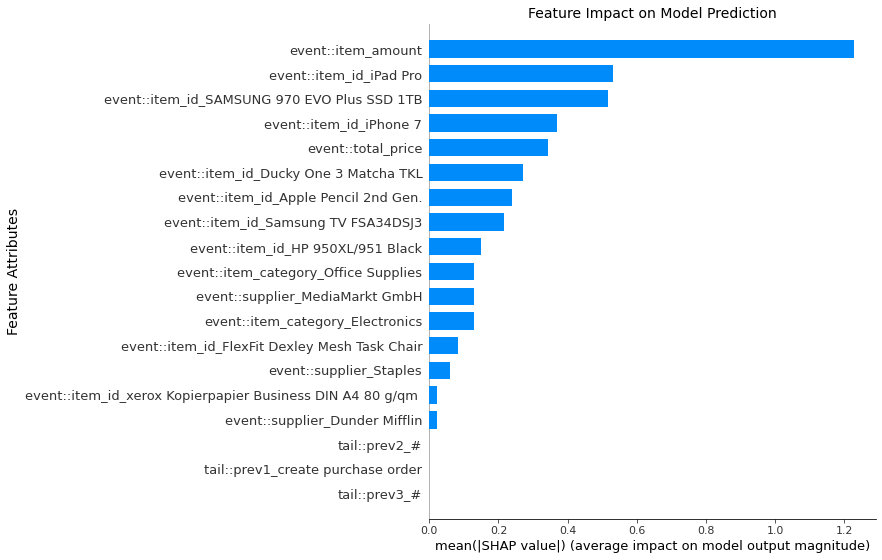

In [32]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_base.guard_manager_per_place[decision_points[0]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[0]].X_test)

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})


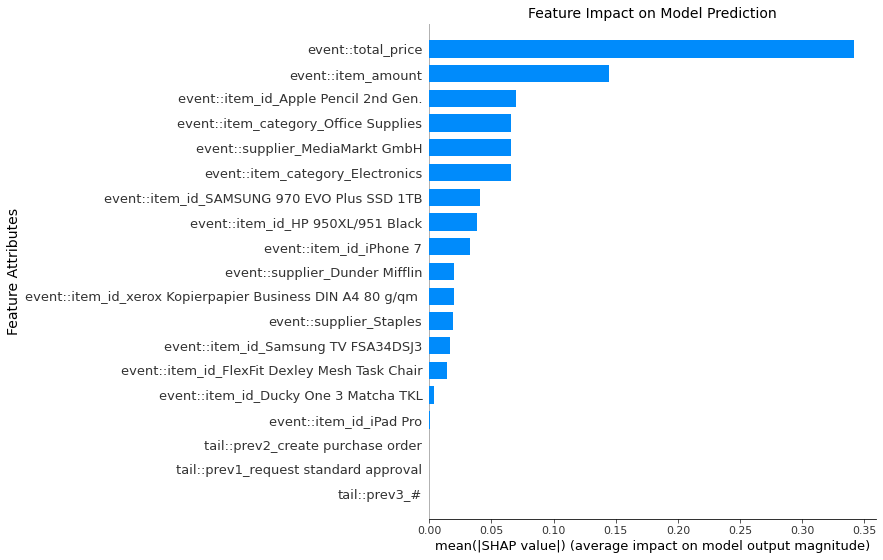

In [33]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_base.guard_manager_per_place[decision_points[1]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[1]].X_test)

Decision point:  ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})


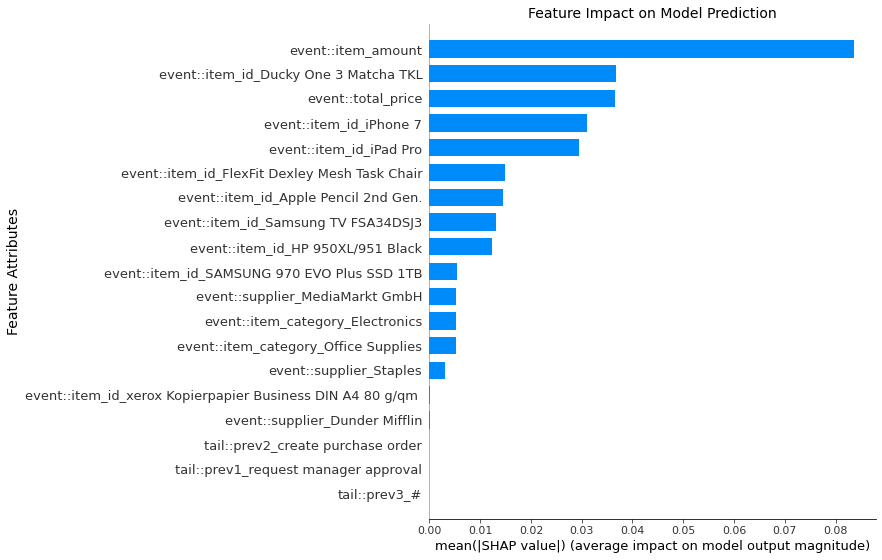

In [34]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_base.guard_manager_per_place[decision_points[2]].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_points[2]].X_test)

### Summary Event Log with some Randomness: - needs to be update when implementations are all done - 

- Request Manager or Standard Approval:  
Only the Decision Tree guard models the true underlying guard. The split to classify the data samples is total_price <= 808. For the other three machine learning techniques the feature attribute item_amount has a huge impact on the model prediction, this attribute is correlated with total_price.

- Manager Rejection or Approval:  
All machine learning techniques have problems modeling the true underlying guard. We can see that the Support Vector Machine guard again uses item_amout for its prediction. Logistic Regression guard seems to pick up noise instead of the true underlying guard. But it is possible that the features with the most impact correlate with the total_price. For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty. The Decision Tree guard assigns all samples to the same class label, which could be due to one of the stop criteria the Decision Tree Classifier uses. 

- Standard Rejection or Approval:  
Some techniques struggle to model the true underlying guard. For the Logistic Regression guard and the Support Vector Machine guard total_price is the feature attribute with the highest impact. For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty. The Decision Tree guard assigns all samples to the same class label, which could be due to one of the stop criteria the Decision Tree Classifier uses. 
    

Overall, all machine learning techniques have their problems modeling the true underlying behavior of the guard if the decisions are partly random. But we can also see, that for example the Decision Tree is at advantage for modeling a binary numeric decision with some overlapping, while the other three techniques are able to detect some correlation between other feature attributes and the feature attribute used in the true guard. Nevertheless all four machine learning guards achieve high performance scores measures using F1-score as seen in the comparision plots.